In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

pd.options.display.max_rows = 200

In [48]:
def build_multichoice_summary(df, factor, aggfunc):
    tmp = pd.DataFrame()
    for col in df.loc[:, df.columns.str.contains(factor+':')].columns:
        tmp = pd.concat([tmp, aggfunc(df[df[col].notnull()]).reset_index().assign(**{factor: col.split(':')[1].strip()})])
    return tmp

def add_order_index(df, order, target_column_name, order_column_name):
    df[order_column_name] = df[target_column_name].map({c:i for i,c in enumerate(order)})

In [49]:
df20 = pd.read_csv("Time-to-Shine-Survey-Responses-anon-.csv")
df21 = pd.read_csv("COVID-Hauora-Wellbeing-Survey-dataset-291021.csv", header=[0,1])
df20.shape, df21.shape

((961, 133), (361, 163))

In [50]:
tmp = df21.columns.tolist()
last = None
for i, c in enumerate(tmp):
    if c[0].startswith('Unnamed:'):
        tmp[i] = (last, c[1])
    else:
        last = c[0]
df21.columns = pd.MultiIndex.from_tuples(tmp)

tmp = df21.columns.tolist()
df21.rename(columns={
    'Are your funding/revenue levels for this past 12 months different from the year previous? (Please show us on the scale below)': 'revenue affect',
    'What type of organisation do you represent? (Please choose from the list below)': 'orgtype',
    'Approximately how many paid staff and/or contractors work with/for your organisation?': 'paid staff',
    'Approximately how many volunteers work with your organisation each month?': 'volunteers',
    'What was the approximate annual income / operations budget for your organisation for the last financial year?': 'income',
    'Of the following options, which best describes the focus of your organisation\'s activities or services?': 'service type',
    'In which region(s) does your organisation operate (please choose all that apply)': 'region',
    'Which of the following ethnic groups do you work with? (Please choose all that apply)': 'ethnic',
    'To what level has your service delivery changed since pre-COVID-19 (March 2020)? (In terms of cuts or increases)': 'service delivery affect',
    'Based on your organisation\'s present financial reserves, approximately how long can you maintain your current levels of staff and/or service delivery?': 'funding reserve',
    'Since COVID-19 arrived, some organisations have had to make adjustments to the size of their paid staff and/or volunteer base. Can you tell us what you have done? (click all that apply)': 'staff',
    'Since COVID-19 arrived, some organisations have made adjustments and innovations to their \'ways of operating or new ways of working\'. What changes has your organisation made?': 'service delivery',
    'What types of financial/non-financial support did your organisation receive since the beginning of COVID-19? (Please choose all that apply)': 'support accessed',
    'What forms of non financial support/resources does your organisation currently need? (Please tick up to five from the list below).': 'support needed',
    'What sorts of changes do you think are needed to strengthen the tangata whenua, community and voluntary sector in the future?': 'sector changes',
    'What are the best things from the COVID-19 experience that will help to maintain your organisation? (please pick from the list below)': 'silver lining',
}, inplace=True)

tmp = df21.columns.tolist()
uniques = [c for c in df21.columns.get_level_values(0).unique() if df21[c].shape[1] == 1]

for i, (c1, c2) in enumerate(tmp):
    if c1 in uniques or c2 == 'Response':
        tmp[i] = c1
    else:
        tmp[i] = c1 + ': ' + c2
        
df21.columns = tmp

In [51]:
df20['service type'] = df20['service type'].map({
    'Health': 'Hauora/Health',
    'Youth development': 'Rangatahi/Youth development',
    'Religion': 'Faith-based',
    'Services for older people': 'Kaumātua/Elderly Services',
    'Refugee and migrant communities': 'Migrant and refugee background communities',
    'Pacific community development': 'Pacifica community development',
    'Alcohol and other drugs': 'Alcohol and/or other drugs',
}).fillna(df20['service type'])

df20['revenue affect'] = df20['revenue affect'].map({
    'We have had, or expect to have, a very large reduction in revenue (decline of 50% or more)': '50% or more decline',
    'We have had, or expect to have, a large reduction in revenue (decline of 20% to 49%)': '20-49% decline',
    'We have had, or expect to have, a moderate reduction in revenue (10-19% decline)': '10-19% decline',
    'We have had, or expect to have, a small reduction in revenue (0-9% decline)': '0-9% decline',
    'We have had, or expect to have, no change in revenue': 'No change in funding/revenue',
    'We have had, or expect to have, a small increase in revenue (0-9% increase)': '0-9% increase',
    'We have had, or expect to have, a moderate increase in revenue (10-19% increase)': '10-19% increase',
    'We have had, or expect to have, a large increase in revenue (increase of 20% to 49%)': '20-49% increase',
    'We have had, or expect to have, a very large increase in revenue (increase of 50% or more)': '50% or more increase',
}).fillna(df20['revenue affect'])

service_delivery_affect_order = ['Substantial cuts', 'Moderate cuts', 'Small cuts', 'Same level of services', 'Small increases', 'Moderate increases', 'Substantial increases']
df20['service delivery affect'] = df20['service delivery affect'].map({
    'We have had to substantially cut back on our services because of COVID-19': 'Substantial cuts',
    'We have had to make moderate cuts to our services because of COVID-19': 'Moderate cuts',
    'We have had to make small cuts to our services because of COVID-19': 'Small cuts',
    'We have maintained services at the same level': 'Same level of services',
    'We have had to make some small increases in our service delivery to respond to COVID-19': 'Small increases',
    'We have had to make moderate increases to our services because of COVID-19': 'Moderate increases',
    'We have had to substantially expand our services to respond to COVID-19': 'Substantial increases',
}).fillna(df20['service delivery affect'])
add_order_index(df20, service_delivery_affect_order, 'service delivery affect', 'service delivery affect index')
add_order_index(df21, service_delivery_affect_order, 'service delivery affect', 'service delivery affect index')

funding_reserve_order = ['More than one year', 'Six to twelve months', 'Four to five months', 'Two to three months', 'Up to one month', 'None of the above', 'I\'m not sure']
df20['funding reserve'] = df20['funding reserve'].map({
    'We have sufficient funds to maintain staff and activity for more than one year': 'More than one year',
    'We have sufficient funds to maintain staff and activity for six to 12 months': 'Six to twelve months',
    'We have sufficient funds to maintain staff and activity for four to five months': 'Four to five months',
    'We have sufficient funds to maintain staff and activity for two to three months': 'Two to three months',
    'We have sufficient funds to maintain staff and activity for up to one month': 'Up to one month',
})
add_order_index(df20, funding_reserve_order, 'funding reserve', 'funding reserve index')
add_order_index(df21, funding_reserve_order, 'funding reserve', 'funding reserve index')

staff_order = ['No paid staff', '1-5 staff', '6-10 staff', '11-20 staff', '21-50 staff', 'More than 50 staff']
volunteer_order = ['No paid volunteers', '1-5 volunteers', '6-10 volunteers', '11-20 volunteers', '21-50 volunteers', 'More than 50 volunteers']
add_order_index(df20, staff_order, 'paid staff', 'paid staff index')
df21['paid staff'] = df21['paid staff'].map(lambda v: v.replace('people', 'staff'))
df21['paid staff'] = df21['paid staff'].replace({'21-30 staff': '21-50 staff',
                                                 '31-40 staff': '21-50 staff',
                                                 '41-50 staff': '21-50 staff'})
add_order_index(df21, staff_order, 'paid staff', 'paid staff index')
add_order_index(df20, volunteer_order, 'volunteers', 'volunteers index')
add_order_index(df21, volunteer_order, 'volunteers', 'volunteers index')

income_order= ['Under $125,000', '$125,000 to under $2 million', '$2 million to under $30 million', '$30 million or more']
# income_order_2021 = ['$0-$24,999', '$25,000-$49,999', '$50,000-$74,999', '$75,000-$99,999', '$100,000-$124,999', '$125,000-$149,999',
#                      '$150,000-$174,999', '$175,000-$199,999', '$200,000-$499,000', '$500,000-$999,999', '$1,000,000-$1,999,999',
#                      '$2 million to under $30 million', '$30 million or more'
#                     ]
df21['income'] = df21['income'].replace({'$0-$24,999': 'Under $125,000',
                                         '$25,000-$49,999': 'Under $125,000',
                                         '$50,000-$74,999': 'Under $125,000',
                                         '$75,000-$99,999': 'Under $125,000',
                                         '$100,000-$124,999': '$125,000 to under $2 million',
                                         '$125,000-$149,999': '$125,000 to under $2 million',
                                         '$150,000-$174,999': '$125,000 to under $2 million',
                                         '$175,000-$199,999': '$125,000 to under $2 million',
                                         '$200,000-$499,000': '$125,000 to under $2 million',
                                         '$500,000-$999,999': '$125,000 to under $2 million',
                                         '$1,000,000-$1,999,999': '$125,000 to under $2 million'})
add_order_index(df20, income_order, 'income', 'income index')
add_order_index(df21, income_order, 'income', 'income index')
df20.loc[df20.income.notnull(), 'income'] = df20.loc[df20.income.notnull(), 'income'].map(lambda v: v.replace('$', '\\$'))
df21.loc[df21['income'].notnull(), 'income'] = df21.loc[df21['income'].notnull(), 'income'].map(lambda v: v.replace('$', '\\$'))

service_delivery_change_order = ['no changes made', 'minor changes made', 'some changes made', 'major changes made']
df20['service delivery change'] = df20['service delivery change'].map({
    'We have made some changes to how we deliver services because of COVID-19': 'some changes made',
    'We have made major changes to how we deliver services because of COVID-19': 'major changes made',
    'We have made minor changes to how we deliver services because of COVID-19': 'minor changes made',
    'We have not made any changes to how we deliver services': 'no changes made',
}).fillna(df20['service delivery change'])
add_order_index(df20, service_delivery_change_order, 'service delivery change', 'service delivery change index')


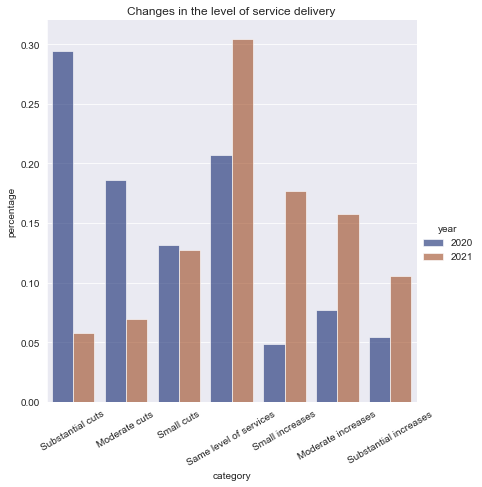

In [52]:
tmp = pd.concat([df20.assign(year=2020), df21.assign(year=2021)]) \
    .groupby('year').apply(lambda grp: grp[['service delivery affect', 'service delivery affect index']].value_counts(normalize=True)) \
    .rename_axis(['year', 'category', 'order']).rename('percentage').reset_index().sort_values(['year', 'order']).drop(columns='order')
sns.catplot(data=tmp, kind="bar", x="category", y="percentage", hue="year",
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.title('Changes in the level of service delivery')
plt.xticks(rotation=30);

Text(0.5, 1.0, 'Changes to the level of service delivered by the number of paid staff within the organisation in 2020')

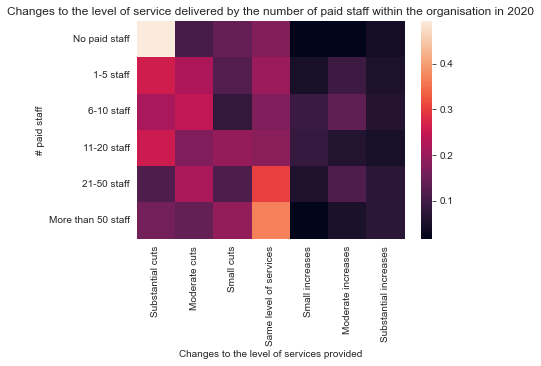

In [53]:
tmp = pd.concat([df20.assign(year=2020), df21.assign(year=2021)]) \
    .groupby(['year', 'paid staff', 'paid staff index']).apply(lambda grp: grp[['service delivery affect', 'service delivery affect index']].value_counts(normalize=True)) \
    .rename_axis(['year', '# paid staff', 'ax order', 'Changes to the level of services provided', 'order']).rename('percentage').reset_index().sort_values(['year', 'order']) \
    .pivot(index=['year', 'ax order', '# paid staff'], columns='Changes to the level of services provided', values='percentage').sort_index() \
    .reset_index().drop(columns=['ax order']).set_index(['year', '# paid staff']) \
    [['Substantial cuts', 'Moderate cuts', 'Small cuts', 'Same level of services', 'Small increases', 'Moderate increases', 'Substantial increases']]
tmp.to_pickle('p_staff_service.pickle')

sns.heatmap(tmp.loc[2020])

plt.title('Changes to the level of service delivered by the number of paid staff within the organisation in 2020')

Text(0.5, 1.0, 'Changes to the level of service delivered by the number of paid staff within the organisation in 2021')

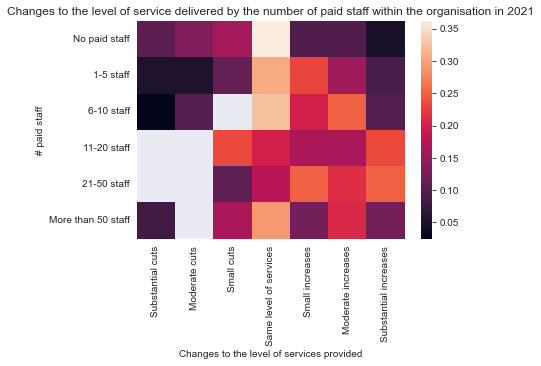

In [54]:
sns.heatmap(tmp.loc[2021])
tmp.loc[2021].to_csv('users21.csv')
plt.title('Changes to the level of service delivered by the number of paid staff within the organisation in 2021')

Text(0.5, 1.0, 'Changes to the level of service delivered by the number of volunteers staff within the organisation in 2020')

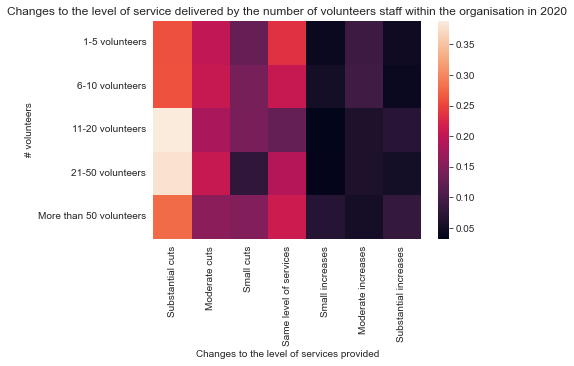

In [55]:
tmp = pd.concat([df20.assign(year=2020), df21.assign(year=2021)]) \
    .groupby(['year', 'volunteers', 'volunteers index']).apply(lambda grp: grp[['service delivery affect', 'service delivery affect index']].value_counts(normalize=True)) \
    .rename_axis(['year', '# volunteers', 'ax order', 'Changes to the level of services provided', 'order']).rename('percentage').reset_index().sort_values(['year', 'order']).drop(columns='order') \
    .pivot(index=['year', 'ax order', '# volunteers'], columns='Changes to the level of services provided', values='percentage').sort_index() \
    .reset_index().drop(columns=['ax order']).set_index(['year', '# volunteers']) \
    [['Substantial cuts', 'Moderate cuts', 'Small cuts', 'Same level of services', 'Small increases', 'Moderate increases', 'Substantial increases']]

tmp.to_pickle('p_volunteers_service.pickle')
sns.heatmap(tmp.loc[2020])
plt.title('Changes to the level of service delivered by the number of volunteers staff within the organisation in 2020')

Text(0.5, 1.0, 'Changes to the level of service delivered by the number of volunteers staff within the organisation in 2021')

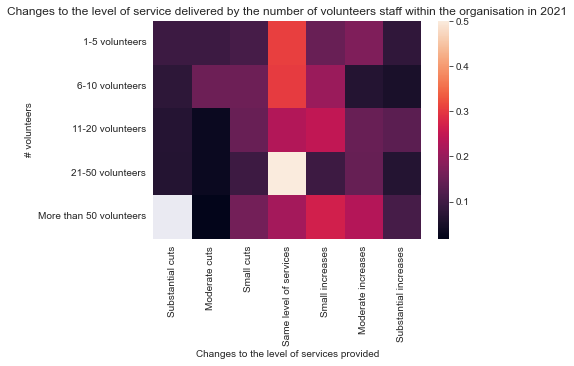

In [56]:
sns.heatmap(tmp.loc[2021])
plt.title('Changes to the level of service delivered by the number of volunteers staff within the organisation in 2021')

Text(0.5, 1.0, 'Changes to the level of service delivered by the organisation service type in 2020')

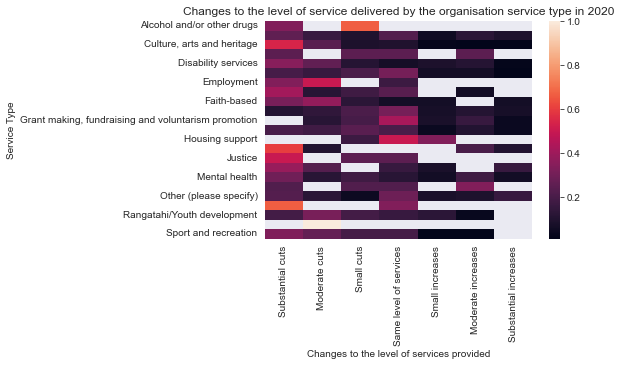

In [57]:
tmp = pd.concat([df20.assign(year=2020), df21.assign(year=2021)]) \
    .groupby(['year', 'service type']).apply(lambda grp: grp[['service delivery affect', 'service delivery affect index']].value_counts(normalize=True)) \
    .rename_axis(['year', 'Service Type', 'Changes to the level of services provided', 'order']).rename('percentage').reset_index().sort_values(['year', 'order']).drop(columns='order') \
    .pivot(index=['year', 'Service Type'], columns='Changes to the level of services provided', values='percentage').sort_index() \
    [['Substantial cuts', 'Moderate cuts', 'Small cuts', 'Same level of services', 'Small increases', 'Moderate increases', 'Substantial increases']]

tmp.to_pickle('p_type_service.pickle')
sns.heatmap(tmp.loc[2020])
plt.title('Changes to the level of service delivered by the organisation service type in 2020')

Text(0.5, 1.0, 'Changes to the level of service delivered by the organisation service type in 2021')

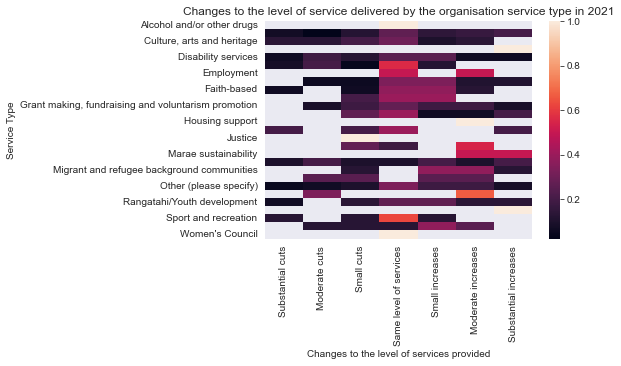

In [58]:
sns.heatmap(tmp.loc[2021])
plt.title('Changes to the level of service delivered by the organisation service type in 2021')

Text(0.5, 1.0, 'Changes to the level of service delivered by the organisation income level in 2020')

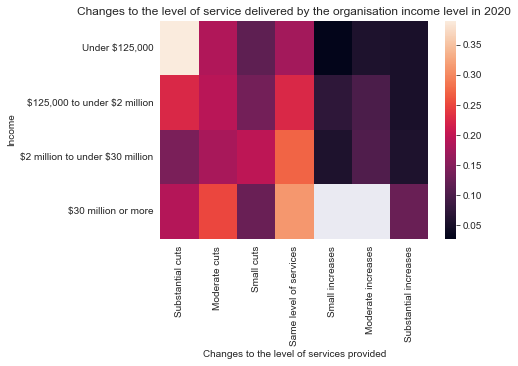

In [59]:
tmp = pd.concat([df20.assign(year=2020), df21.assign(year=2021)]) \
    .groupby(['year', 'income', 'income index']).apply(lambda grp: grp[['service delivery affect', 'service delivery affect index']].value_counts(normalize=True)) \
    .rename_axis(['year', 'Income', 'ax order', 'Changes to the level of services provided', 'order']).rename('percentage').reset_index().sort_values(['year', 'order']).drop(columns='order') \
    .pivot(index=['year', 'ax order', 'Income'], columns='Changes to the level of services provided', values='percentage').sort_index() \
    .reset_index().drop(columns=['ax order']).set_index(['year', 'Income']) \
    [['Substantial cuts', 'Moderate cuts', 'Small cuts', 'Same level of services', 'Small increases', 'Moderate increases', 'Substantial increases']]

tmp.to_pickle('p_funding_service.pickle')
sns.heatmap(tmp.loc[2020])
plt.title('Changes to the level of service delivered by the organisation income level in 2020')

Text(0.5, 1.0, 'Changes to the level of service delivered by the organisation income level in 2021')

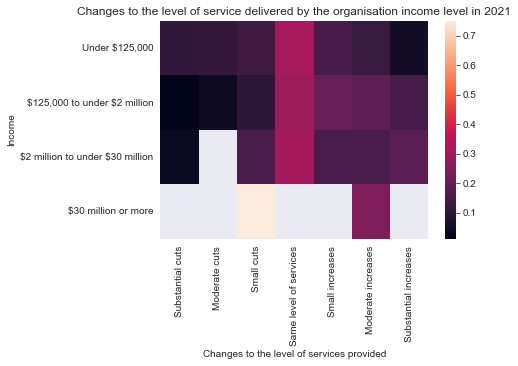

In [60]:
sns.heatmap(tmp.loc[2021])
plt.title('Changes to the level of service delivered by the organisation income level in 2021')

Text(0.5, 1.0, 'Changes to the level of service delivered by region serviced in 2020')

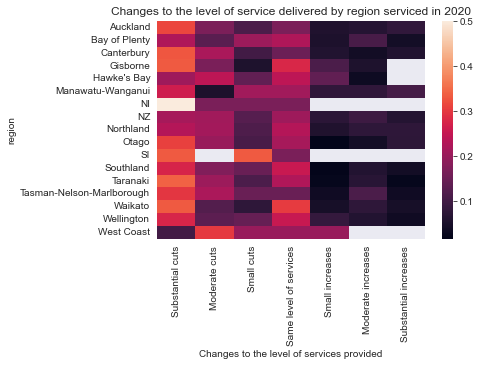

In [61]:
tmp = pd.concat([
    build_multichoice_summary(df20, 'region', lambda grp: pd.DataFrame(grp['service delivery affect'].value_counts(normalize=True).rename_axis('Changes to the level of services provided').rename('percentage'))).assign(year=2020),
    build_multichoice_summary(df21, 'region', lambda grp: pd.DataFrame(grp['service delivery affect'].value_counts(normalize=True).rename_axis('Changes to the level of services provided').rename('percentage'))).assign(year=2021),
]).pivot(index=['year', 'region'], columns='Changes to the level of services provided', values='percentage') \
    [['Substantial cuts', 'Moderate cuts', 'Small cuts', 'Same level of services', 'Small increases', 'Moderate increases', 'Substantial increases']]

sns.heatmap(tmp.loc[2020])
plt.title('Changes to the level of service delivered by region serviced in 2020')

Text(0.5, 1.0, 'Changes to the level of service delivered by region serviced in 2021')

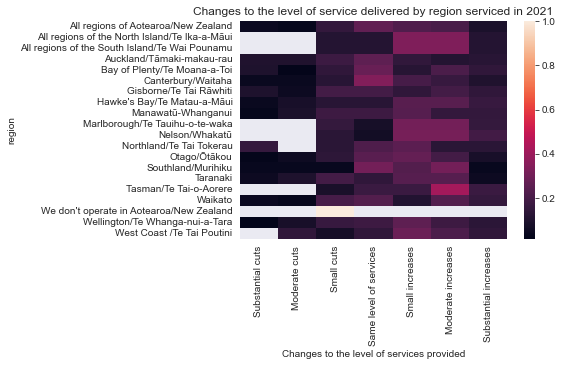

In [62]:
sns.heatmap(tmp.loc[2021])
plt.title('Changes to the level of service delivered by region serviced in 2021')

Text(0.5, 1.0, 'Changes to the level of service delivered by target ethnicity serviced in 2020')

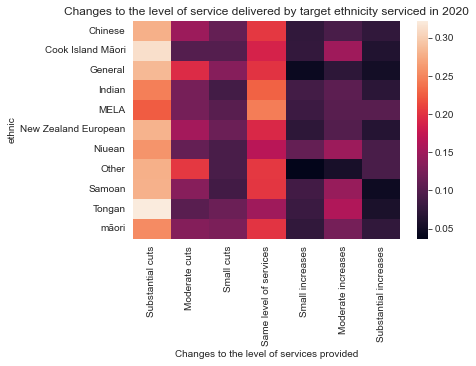

In [63]:
tmp = pd.concat([
    build_multichoice_summary(df20, 'ethnic', lambda grp: pd.DataFrame(grp['service delivery affect'].value_counts(normalize=True).rename_axis('Changes to the level of services provided').rename('percentage'))).assign(year=2020),
    build_multichoice_summary(df21, 'ethnic', lambda grp: pd.DataFrame(grp['service delivery affect'].value_counts(normalize=True).rename_axis('Changes to the level of services provided').rename('percentage'))).assign(year=2021),
]).pivot(index=['year', 'ethnic'], columns='Changes to the level of services provided', values='percentage') \
    [['Substantial cuts', 'Moderate cuts', 'Small cuts', 'Same level of services', 'Small increases', 'Moderate increases', 'Substantial increases']]
tmp.to_pickle('p_ethnic_service.pickle')
sns.heatmap(tmp.loc[2020])
plt.title('Changes to the level of service delivered by target ethnicity serviced in 2020')

Text(0.5, 1.0, 'Changes to the level of service delivered by target ethnicity serviced in 2021')

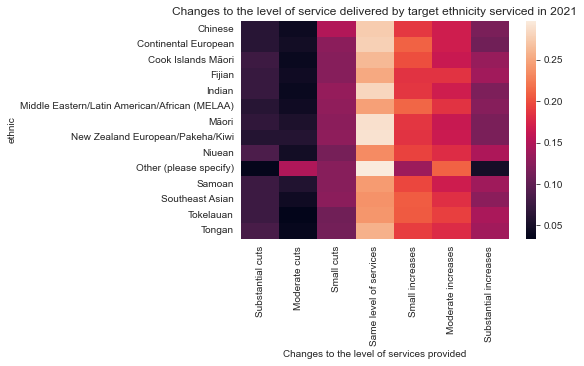

In [64]:
sns.heatmap(tmp.loc[2021])
plt.title('Changes to the level of service delivered by target ethnicity serviced in 2021')

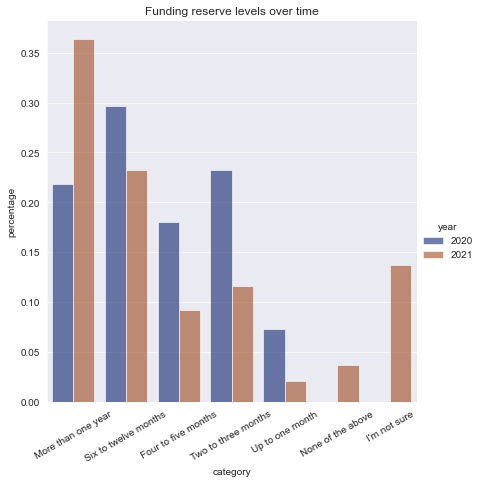

In [65]:
tmp = pd.concat([df20.assign(year=2020), df21.assign(year=2021)]) \
    .groupby('year').apply(lambda grp: grp[['funding reserve', 'funding reserve index']].value_counts(normalize=True)) \
    .rename_axis(['year', 'category', 'order']).rename('percentage').reset_index().sort_values(['year', 'order']).drop(columns='order')
sns.catplot(data=tmp, kind="bar", x="category", y="percentage", hue="year",
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.title('Funding reserve levels over time')
plt.xticks(rotation=30);

Text(0.5, 1.0, 'Funding reserve level by the number of paid staff within the organisation in 2020')

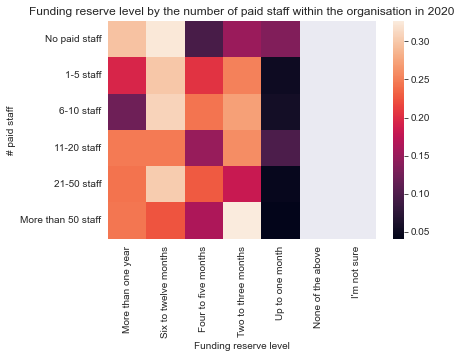

In [66]:
tmp = pd.concat([df20.assign(year=2020), df21.assign(year=2021)]) \
    .groupby(['year', 'paid staff', 'paid staff index']).apply(lambda grp: grp['funding reserve'].value_counts(normalize=True)) \
    .rename_axis(['year', '# paid staff', 'ax order', 'Funding reserve level']).rename('percentage').reset_index() \
    .pivot(index=['year', 'ax order', '# paid staff'], columns='Funding reserve level', values='percentage').sort_index() \
    .reset_index().drop(columns=['ax order']).set_index(['year', '# paid staff']) \
    [['More than one year', 'Six to twelve months', 'Four to five months', 'Two to three months', 'Up to one month', 'None of the above', "I'm not sure"]]
tmp.to_pickle('p_staff_funding.pickle')
sns.heatmap(tmp.loc[2020])
plt.title('Funding reserve level by the number of paid staff within the organisation in 2020')

Text(0.5, 1.0, 'Funding reserve level by the number of paid staff within the organisation in 2021')

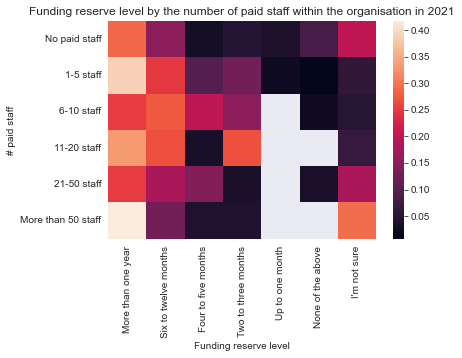

In [67]:
sns.heatmap(tmp.loc[2021])
plt.title('Funding reserve level by the number of paid staff within the organisation in 2021')

Text(0.5, 1.0, 'Funding reserve level by the number of volunteers staff within the organisation in 2020')

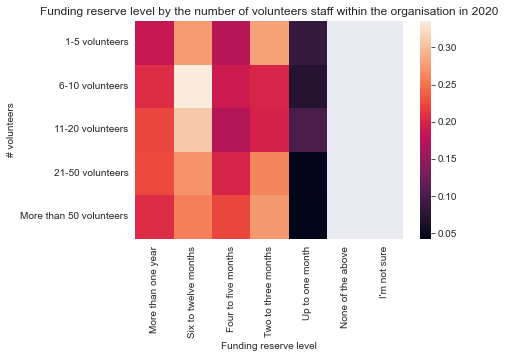

In [68]:
tmp = pd.concat([df20.assign(year=2020), df21.assign(year=2021)]) \
    .groupby(['year', 'volunteers', 'volunteers index']).apply(lambda grp: grp['funding reserve'].value_counts(normalize=True)) \
    .rename_axis(['year', '# volunteers', 'ax order', 'Funding reserve level']).rename('percentage').reset_index() \
    .pivot(index=['year', 'ax order', '# volunteers'], columns='Funding reserve level', values='percentage').sort_index() \
    .reset_index().drop(columns=['ax order']).set_index(['year', '# volunteers']) \
    [['More than one year', 'Six to twelve months', 'Four to five months', 'Two to three months', 'Up to one month', 'None of the above', "I'm not sure"]]
tmp.to_pickle('p_volunteers_funding.pickle')
sns.heatmap(tmp.loc[2020])
plt.title('Funding reserve level by the number of volunteers staff within the organisation in 2020')

Text(0.5, 1.0, 'Funding reserve level by the number of volunteers staff within the organisation in 2021')

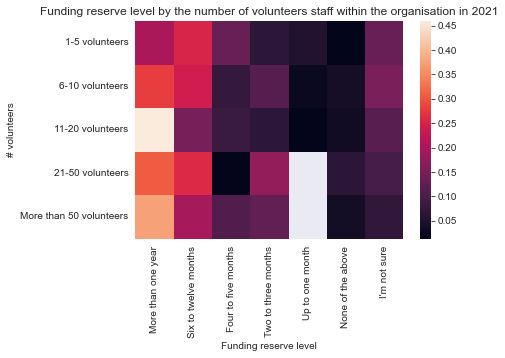

In [69]:
sns.heatmap(tmp.loc[2021])
plt.title('Funding reserve level by the number of volunteers staff within the organisation in 2021')

Text(0.5, 1.0, 'Funding reserve level by the organisation service type in 2020')

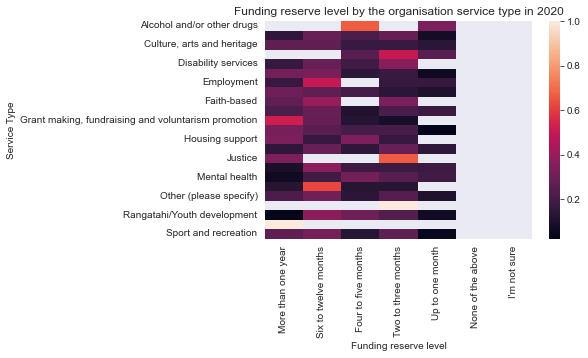

In [70]:
tmp = pd.concat([df20.assign(year=2020), df21.assign(year=2021)]) \
    .groupby(['year', 'service type']).apply(lambda grp: grp['funding reserve'].value_counts(normalize=True)) \
    .rename_axis(['year', 'Service Type', 'Funding reserve level']).rename('percentage').reset_index() \
    .pivot(index=['year', 'Service Type'], columns='Funding reserve level', values='percentage').sort_index() \
    [['More than one year', 'Six to twelve months', 'Four to five months', 'Two to three months', 'Up to one month', 'None of the above', "I'm not sure"]]
tmp.to_pickle('p_type_funding.pickle')
sns.heatmap(tmp.loc[2020])
plt.title('Funding reserve level by the organisation service type in 2020')

Text(0.5, 1.0, 'Funding reserve level by the organisation service type in 2021')

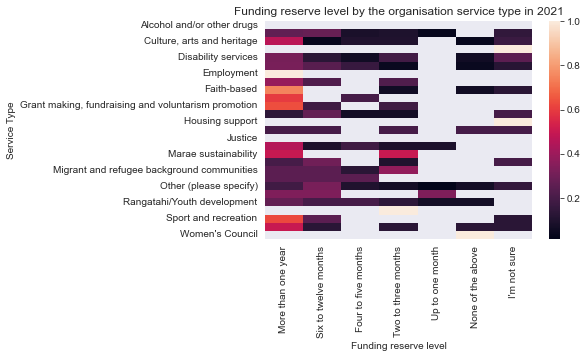

In [71]:
sns.heatmap(tmp.loc[2021])
plt.title('Funding reserve level by the organisation service type in 2021')

Text(0.5, 1.0, 'Funding reserve level by the organisation income level in 2020')

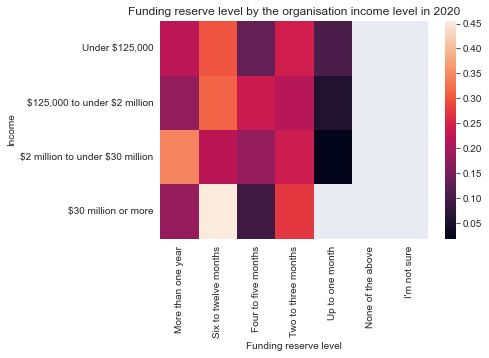

In [72]:
tmp = pd.concat([df20.assign(year=2020), df21.assign(year=2021)]) \
    .groupby(['year', 'income', 'income index']).apply(lambda grp: grp['funding reserve'].value_counts(normalize=True)) \
    .rename_axis(['year', 'Income', 'ax order', 'Funding reserve level']).rename('percentage').reset_index() \
    .pivot(index=['year', 'ax order', 'Income'], columns='Funding reserve level', values='percentage').sort_index() \
    .reset_index().drop(columns=['ax order']).set_index(['year', 'Income']) \
    [['More than one year', 'Six to twelve months', 'Four to five months', 'Two to three months', 'Up to one month', 'None of the above', "I'm not sure"]]
tmp.to_pickle('p_income_funding.pickle')
sns.heatmap(tmp.loc[2020])
plt.title('Funding reserve level by the organisation income level in 2020')

Text(0.5, 1.0, 'Funding reserve level by the organisation income level in 2021')

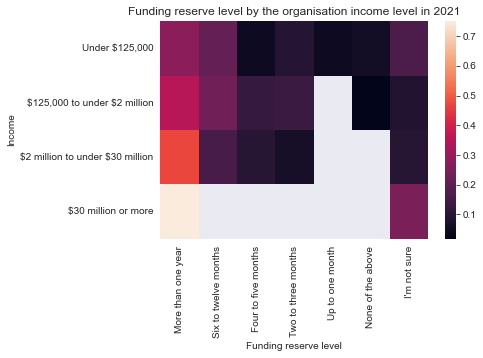

In [73]:
sns.heatmap(tmp.loc[2021])
plt.title('Funding reserve level by the organisation income level in 2021')

Text(0.5, 1.0, 'Funding reserve level by region serviced in 2020')

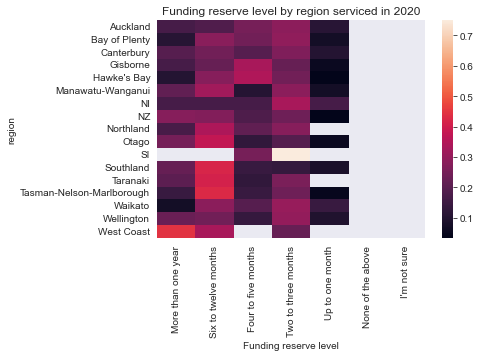

In [74]:
tmp = pd.concat([
    build_multichoice_summary(df20, 'region', lambda grp: pd.DataFrame(grp['funding reserve'].value_counts(normalize=True).rename_axis('Funding reserve level').rename('percentage'))).assign(year=2020),
    build_multichoice_summary(df21, 'region', lambda grp: pd.DataFrame(grp['funding reserve'].value_counts(normalize=True).rename_axis('Funding reserve level').rename('percentage'))).assign(year=2021),
]).pivot(index=['year', 'region'], columns='Funding reserve level', values='percentage') \
    [['More than one year', 'Six to twelve months', 'Four to five months', 'Two to three months', 'Up to one month', 'None of the above', "I'm not sure"]]

sns.heatmap(tmp.loc[2020])
plt.title('Funding reserve level by region serviced in 2020')

Text(0.5, 1.0, 'Funding reserve level by region serviced in 2021')

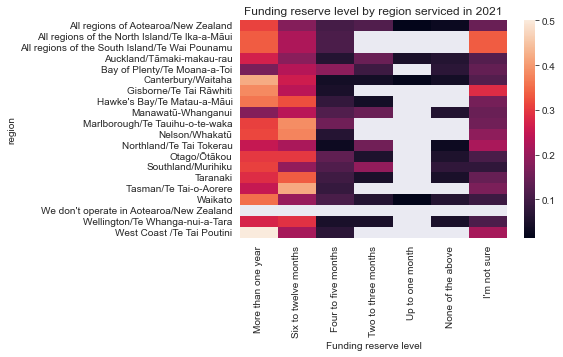

In [75]:
sns.heatmap(tmp.loc[2021])
plt.title('Funding reserve level by region serviced in 2021')

Text(0.5, 1.0, 'Funding reserve level by target ethnicity serviced in 2020')

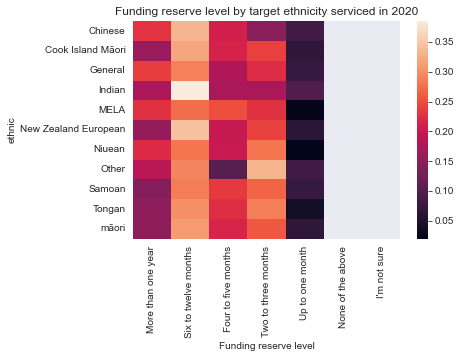

In [76]:
tmp = pd.concat([
    build_multichoice_summary(df20, 'ethnic', lambda grp: pd.DataFrame(grp['funding reserve'].value_counts(normalize=True).rename_axis('Funding reserve level').rename('percentage'))).assign(year=2020),
    build_multichoice_summary(df21, 'ethnic', lambda grp: pd.DataFrame(grp['funding reserve'].value_counts(normalize=True).rename_axis('Funding reserve level').rename('percentage'))).assign(year=2021),
]).pivot(index=['year', 'ethnic'], columns='Funding reserve level', values='percentage') \
    [['More than one year', 'Six to twelve months', 'Four to five months', 'Two to three months', 'Up to one month', 'None of the above', "I'm not sure"]]
tmp.to_pickle('p_ethnic_funding.pickle')
sns.heatmap(tmp.loc[2020])
plt.title('Funding reserve level by target ethnicity serviced in 2020')

Text(0.5, 1.0, 'Funding reserve level by target ethnicity serviced in 2021')

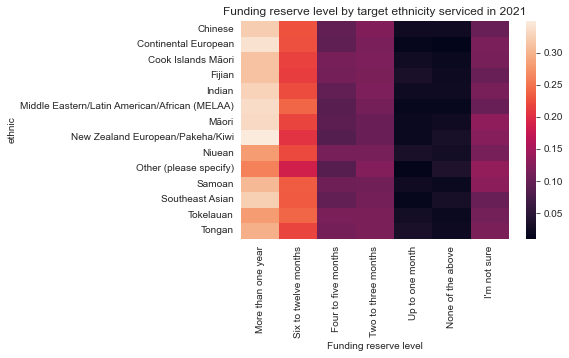

In [77]:
sns.heatmap(tmp.loc[2021])
plt.title('Funding reserve level by target ethnicity serviced in 2021')

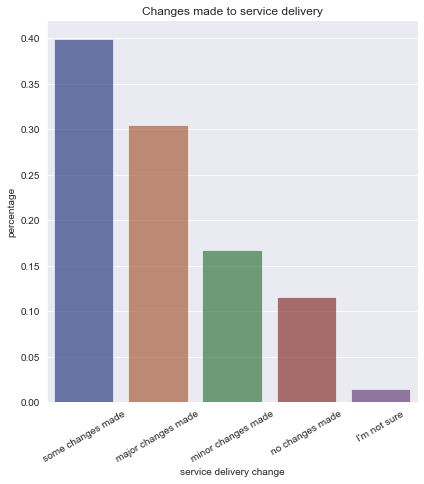

In [78]:
tmp = df20['service delivery change'].value_counts(normalize=True).rename('percentage').rename_axis('service delivery change').reset_index()
sns.catplot(data=tmp, kind="bar", x="service delivery change", y="percentage",
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.title('Changes made to service delivery')
plt.xticks(rotation=30);

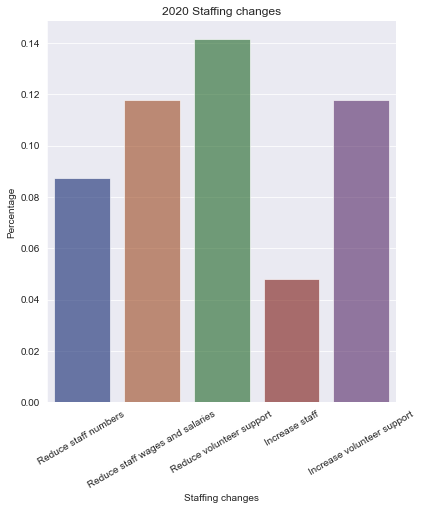

In [79]:
tmp = build_multichoice_summary(df20, 'staff', lambda grp: pd.Series(len(grp))) \
    .rename(columns={0: 'Percentage', 'staff': 'Staffing changes'}).drop(columns='index')
tmp = tmp[~tmp['Staffing changes'].isin(['Not applicable', 'Other (please specify)'])]
tmp['Percentage'] = tmp['Percentage'] / len(df20)

sns.catplot(data=tmp, kind="bar", x="Staffing changes", y="Percentage",
    ci="sd", palette="dark", alpha=.6, height=6)
plt.title('2020 Staffing changes')
plt.xticks(rotation=30);

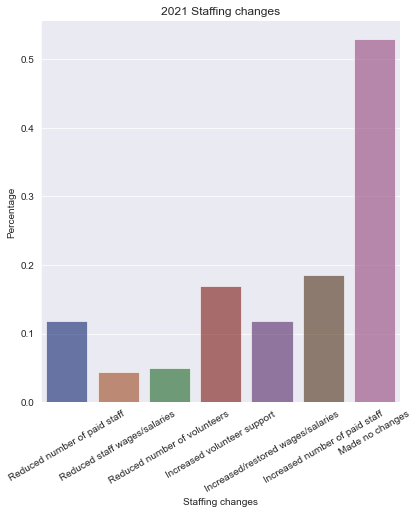

In [80]:
tmp = build_multichoice_summary(df21, 'staff', lambda grp: pd.Series(len(grp))) \
    .rename(columns={0: 'Percentage', 'staff': 'Staffing changes'}).drop(columns='index')
tmp = tmp[~tmp['Staffing changes'].isin(['Not applicable', 'Other (please specify)'])]
tmp['Percentage'] = tmp['Percentage'] / len(df21)

sns.catplot(data=tmp, kind="bar", x="Staffing changes", y="Percentage",
    ci="sd", palette="dark", alpha=.6, height=6)
plt.title('2021 Staffing changes')
plt.xticks(rotation=30);

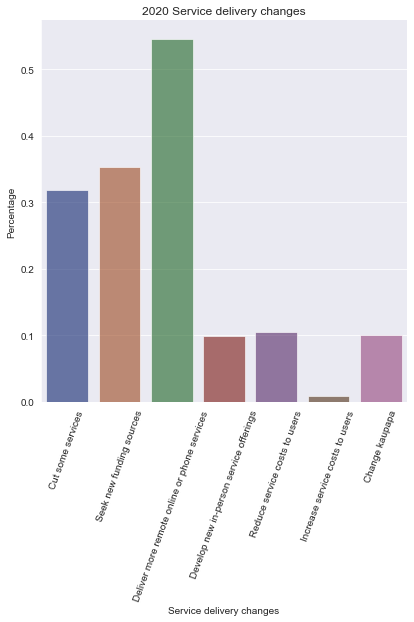

In [81]:
tmp = build_multichoice_summary(df20, 'service delivery', lambda grp: pd.Series(len(grp))) \
    .rename(columns={0: 'Percentage', 'service delivery': 'Service delivery changes'}).drop(columns='index')
tmp = tmp[~tmp['Service delivery changes'].isin(['Not applicable', 'Other (please specify)'])]
tmp['Percentage'] = tmp['Percentage'] / len(df20)

sns.catplot(data=tmp, kind="bar", x="Service delivery changes", y="Percentage",
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.title('2020 Service delivery changes')
plt.xticks(rotation=70);

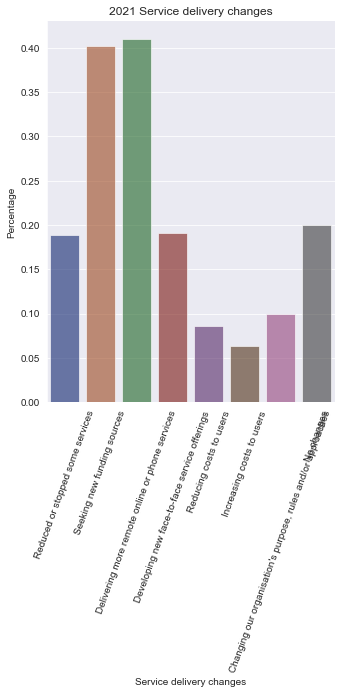

In [82]:
tmp = build_multichoice_summary(df21, 'service delivery', lambda grp: pd.Series(len(grp))) \
    .rename(columns={0: 'Percentage', 'service delivery': 'Service delivery changes'}).drop(columns='index')
tmp = tmp[~tmp['Service delivery changes'].isin(['Can you give us some examples of other innovations and changes you have made or adopted?'])]
tmp['Percentage'] = tmp['Percentage'] / len(df21)

sns.catplot(data=tmp, kind="bar", x="Service delivery changes", y="Percentage",
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.title('2021 Service delivery changes')
plt.xticks(rotation=70);

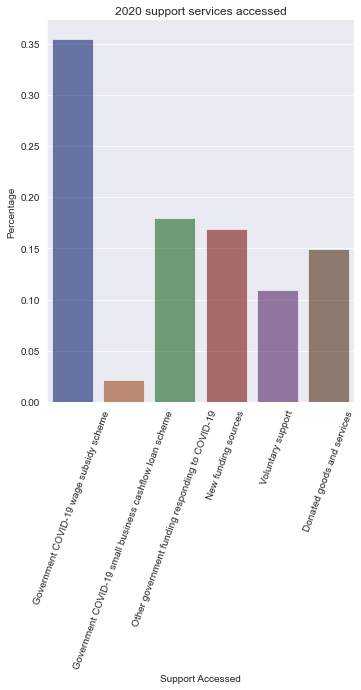

In [83]:
tmp = build_multichoice_summary(df20, 'support accessed', lambda grp: pd.Series(len(grp))) \
    .rename(columns={0: 'Percentage', 'support accessed': 'Support Accessed'}).drop(columns='index')
tmp = tmp[~tmp['Support Accessed'].isin(['Not applicable', 'Other (please specify)'])]
tmp['Percentage'] = tmp['Percentage'] / len(df20)

sns.catplot(data=tmp, kind="bar", x="Support Accessed", y="Percentage",
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.title('2020 support services accessed')
plt.xticks(rotation=70);

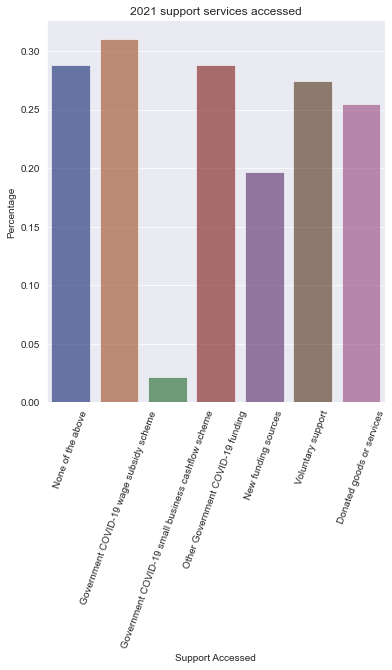

In [84]:
tmp = build_multichoice_summary(df21, 'support accessed', lambda grp: pd.Series(len(grp))) \
    .rename(columns={0: 'Percentage', 'support accessed': 'Support Accessed'}).drop(columns='index')
tmp = tmp[~tmp['Support Accessed'].isin(['Not applicable', 'Other (please specify)'])]
tmp['Percentage'] = tmp['Percentage'] / len(df21)

sns.catplot(data=tmp, kind="bar", x="Support Accessed", y="Percentage",
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.title('2021 support services accessed')
plt.xticks(rotation=70);

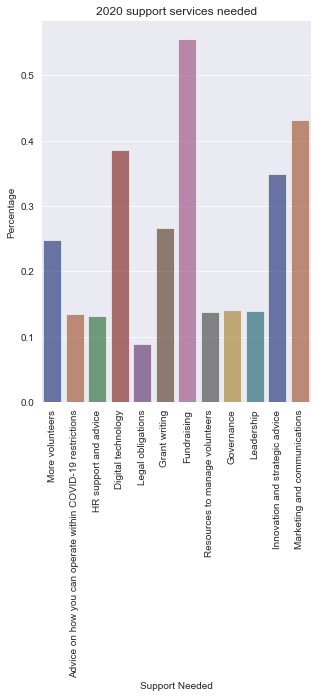

In [85]:
tmp = build_multichoice_summary(df20, 'support needed', lambda grp: pd.Series(len(grp))) \
    .rename(columns={0: 'Percentage', 'support needed': 'Support Needed'}).drop(columns='index')
tmp = tmp[~tmp['Support Needed'].isin(['Not applicable', 'Other (please specify)'])]
tmp['Percentage'] = tmp['Percentage'] / len(df20)

sns.catplot(data=tmp, kind="bar", x="Support Needed", y="Percentage",
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.title('2020 support services needed')
plt.xticks(rotation=90);

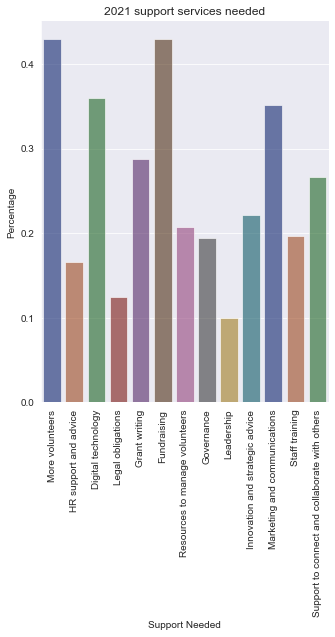

In [86]:
tmp = build_multichoice_summary(df21, 'support needed', lambda grp: pd.Series(len(grp))) \
    .rename(columns={0: 'Percentage', 'support needed': 'Support Needed'}).drop(columns='index')
tmp = tmp[~tmp['Support Needed'].isin(['Not applicable', 'Other (please specify)'])]
tmp['Percentage'] = tmp['Percentage'] / len(df21)

sns.catplot(data=tmp, kind="bar", x="Support Needed", y="Percentage",
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.title('2021 support services needed')
plt.xticks(rotation=90);

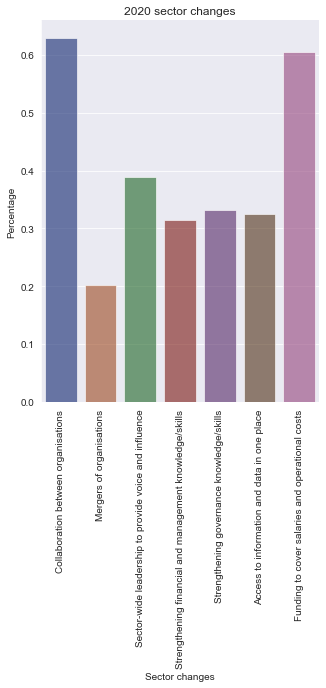

In [87]:
tmp = build_multichoice_summary(df20, 'sector changes', lambda grp: pd.Series(len(grp))) \
    .rename(columns={0: 'Percentage', 'sector changes': 'Sector changes'}).drop(columns='index')
tmp = tmp[~tmp['Sector changes'].isin(['Not applicable', 'Other (please specify)'])]
tmp['Percentage'] = tmp['Percentage'] / len(df20)

sns.catplot(data=tmp, kind="bar", x="Sector changes", y="Percentage",
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.title('2020 sector changes')
plt.xticks(rotation=90);

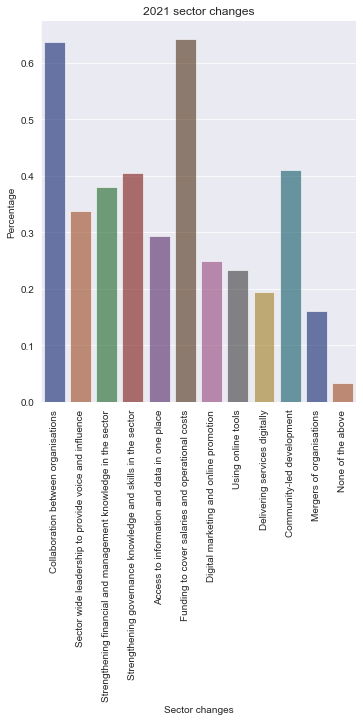

In [88]:
tmp = build_multichoice_summary(df21, 'sector changes', lambda grp: pd.Series(len(grp))) \
    .rename(columns={0: 'Percentage', 'sector changes': 'Sector changes'}).drop(columns='index')
tmp = tmp[~tmp['Sector changes'].isin(['Not applicable', 'Other (Please specify).'])]
tmp['Percentage'] = tmp['Percentage'] / len(df21)

sns.catplot(data=tmp, kind="bar", x="Sector changes", y="Percentage",
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.title('2021 sector changes')
plt.xticks(rotation=90);

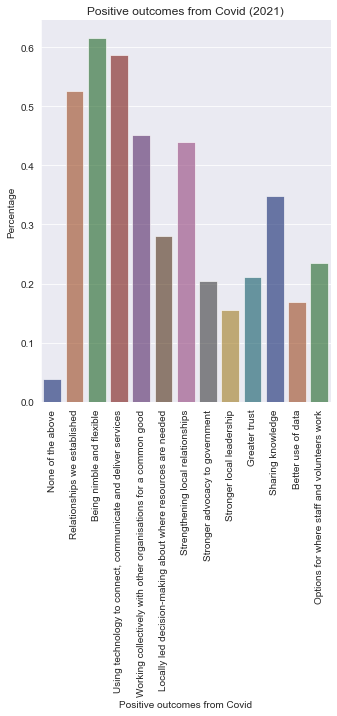

In [89]:
tmp = build_multichoice_summary(df21, 'silver lining', lambda grp: pd.Series(len(grp))) \
    .rename(columns={0: 'Percentage', 'silver lining': 'Positive outcomes from Covid'}).drop(columns='index')
tmp = tmp[~tmp['Positive outcomes from Covid'].isin(['Not applicable', 'Other (please specify)'])]
tmp['Percentage'] = tmp['Percentage'] / len(df21)

sns.catplot(data=tmp, kind="bar", x="Positive outcomes from Covid", y="Percentage",
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.title('Positive outcomes from Covid (2021)')
plt.xticks(rotation=90);

In [90]:
df21.iloc[0:1].T

,0
Respondent ID,12894661762
What is your main role within the organisation?,Chief Executive or Executive Director
Other role (please specify),NaN
orgtype,Charitable Trust
Other (please specify): Other (please specify),NaN
paid staff,6-10 staff
volunteers,11-20 volunteers
What is the average number of hours worked by your organisation's volunteers each month?,12
income,"\$125,000 to under \$2 million"
service type,Other (please specify)


In [91]:
df20.drop(columns=['revenue_affect', 'revenue_sign']).describe().T

KeyError: "['revenue_affect', 'revenue_sign'] not found in axis"

In [ ]:
df21.drop(columns=['revenue_affect', 'revenue_sign']).describe().T